# **Linear regression implementation using numpy**

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Data preparation using Pandas

In [219]:
data = pd.read_csv('./car_dataset/car data.csv')
# I hate underscores
data.columns = data.columns.map(
    lambda x: ' '.join(x.split('_'))
    )
data.head(2)

,Car Name,Year,Selling Price,Present Price,Kms Driven,Fuel Type,Seller Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [220]:
# Encoding Categorical Data
data.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\Henti\AppData\Local\Temp\ipykernel_11288\1923786834.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\Henti\AppData\Local\Temp\ipykernel_11288\1923786834.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Seller Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\Henti\AppData\Local\Temp\ipykernel_11288\1923786834.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future vers

In [223]:
data.value_counts('Transmission')

Transmission
0    261
1     40
Name: count, dtype: int64

In [224]:
# fuel_mask = data['Fuel Type'].isin([0, 1, 2])
# data = data[fuel_mask]

# seller_mask = data['Seller Type'].isin([0, 1])
# data = data[seller_mask]

In [212]:
# features = ['Seller Type', 'Fuel Type', 'Transmission', 'Year', 'Kilometer', 'Engine', 'Seating Capacity','Fuel Tank Capacity', 'Price']
# data = data[features]

# data['Seller Type'] = data['Seller Type'].map(int)
# data['Engine'] = data['Engine'].map(lambda engine: int(engine[:-3]), na_action='ignore')
# data['Engine']

In [225]:
data = data.drop('Car Name', axis=1)
data['Seller Type'] = data['Seller Type'].map(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling Price  301 non-null    float64
 2   Present Price  301 non-null    float64
 3   Kms Driven     301 non-null    int64  
 4   Fuel Type      301 non-null    int64  
 5   Seller Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [205]:
# data = data.dropna(subset=['Engine', 'Seating Capacity','Fuel Tank Capacity'])
# data.info()

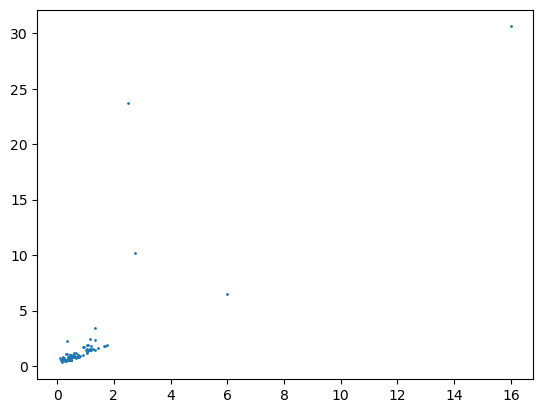

In [214]:
plt.scatter(data['Selling Price'], data['Present Price'], s=1)

## Estimation using sk-learn LinearRegression class

In [242]:
X = data.drop(['Selling Price'], axis=1) # data['Present Price'].to_numpy()[..., np.newaxis] #
Y = data['Selling Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [243]:
X_train.shape, X_test.shape

((240, 7), (61, 7))

### Scores using 'Present Price' feature only:
 - Train score: 0.7912190751012238
 - Test score: 0.6873518619001651


In [244]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(f"Train score: {r2_score(Y_train, model.predict(X_train))}")
print(f"Test score: {r2_score(Y_test, Y_pred)}")

Train score: 0.8839793496750799
Test score: 0.8468053957652042


## Linear Regression (n-dimensional) implementation

In [62]:
class LinearRegression():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        # n - sample size, m - number of features
        self.n, self.m = self.X.shape 
        self.reset_weights()
        self.normalize()

    def normalize(self):
        self.X_min, self.Y_min = self.X.min(axis=0), self.Y.min(axis=0)
        self.X_max, self.Y_max = self.X.max(axis=0), self.Y.max(axis=0)
        self.X = (self.X - self.X_min) / ( self.X_max - self.X_min)
        self.Y = (self.Y - self.Y_min) / ( self.Y_max - self.Y_min)

    def reset_weights(self):
        self.W = [0]*self.m
        self.b = 0
        self.err_history = []

    def denormalize(self, data, min_val, max_val):
        return data * (max_val - min_val) + min_val

    def predict(self, new_X):
        y_hat = new_X*self.W + self.b
        y_hat = self.denormalize( y_hat, self.y_min, self.y_max )
        return y_hat

    def train(self, alpha=0.01, epochs=10, minimum=0.01):
        self.reset_weights()
        m = len(self.X)
        MSE_error = 0

        for epoch in range(epochs):
            for x, y in zip( self.X, self.Y ):
                y_hat = self.W*x+self.b

                self.W -= alpha* (-2* (y - y_hat)*x )
                self.b -= alpha* (-2* (y - y_hat) )

                MSE_error += (y - y_hat)**2
            # plt.plot( X, self.predict(self.X), c='red' )

            MSE_error /= m
            self.err_history.append(MSE_error)
            # print(f"{self.W:<7.3f} | {self.b:<7.3f} | {MSE_error:<7.3f} -- {epoch}")

            # if MSE_error < minimum:
            #     return None
            MSE_error = 0
LR = LinearRegression(X, Y)

In [64]:
LR.Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
LR.train(alpha=0.01, epochs=100, minimum=0.01)

In [5]:
print( LR.W, LR.b )

0.8695648465969253 0.004824863337128357


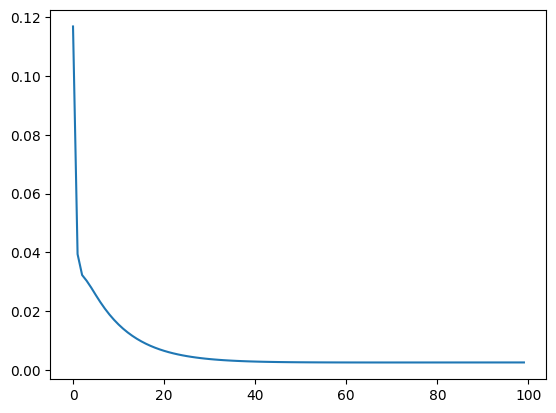

In [7]:
plt.plot( LR.err_history )
plt.show()

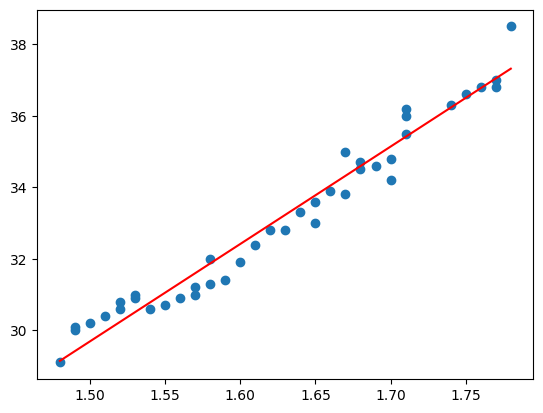

In [ ]:
plt.scatter(X, y)
plt.plot( X, LR.predict(LR.X), c='red' )

# Tesing results, Comparing to the Sk-learn implementation:

In [2]:
X = [1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78]
y = [29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5]

X = np.array(X)
y = np.array(y)

In [ ]:
# импортируем библиотеку Numpy
import numpy as np

# преобразуем наш список X сначала в одномерный массив Numpy, а затем добавим второе измерение
X = np.array(X).reshape(-1, 1)

# список y достаточно преобразовать в одномерный массив Numpy
y = np.array(y)

In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
# т.е. найдем те самые веса или наклон и сдвиг прямой с помощью функции потерь
model.fit(X, y)

LinearRegression()

In [ ]:
# выведем наклон и сдвиг с помощью атрибутов coef_ и intercept_ соответственно
print(model.coef_, model.intercept_)

[26.86181201] -10.570936299787334


Новое уравнение, найдено с помощью библиотеки Scikit-learn:

$$ y = 26.86x - 10.57 $$

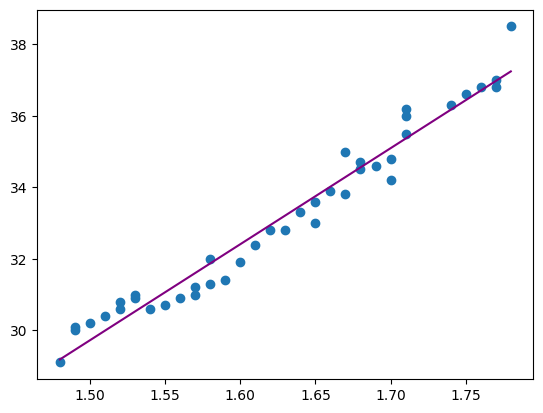

In [ ]:
y_sklearn = lambda x: model.coef_*x + model.intercept_
plt.scatter(X, y)
plt.plot( X, y_sklearn(X), c='purple' )

In [ ]:
# на основе значений роста (Х) предскажем значения обхвата шеи
y_pred = model.predict(X)

# выведем первые пять значений, с помощью диапазоне индексов
print(y_pred[:5])

[29.18454547 29.45316359 29.45316359 29.72178171 29.99039983]


In [ ]:
# импортируем модуль метрик, то есть измерений качества моделей
from sklearn import metrics
# выведем ту самую среднюю сумму расстояний или, говоря более корректно,
# среднеквадратическую ошибку
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred))

Mean Squared Error (MSE): 0.00257287870832655


In [ ]:
# избавимся от квадрата в вычислениях, возьмем квадратный корень из нашей метрики
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Root Mean Squared Error (RMSE): 0.05072355181103301


In [ ]:
# сравним RMSE со средним обхватом шеи: модель неплохо обучилась!!!
y.mean()

0.42579138557343005